<a href="https://colab.research.google.com/github/rajuiit/ML-Brain-Stroke-Prediction/blob/main/brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier

# Training
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score


In [ ]:
train = pd.read_csv('gdrive/My Drive/Brain Stroke/stroke_train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
train['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
train['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
train['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
print(train[["gender", "stroke"]].groupby(['gender'], as_index=False).mean())

   gender    stroke
0  Female  0.047094
1    Male  0.051064
2   Other  0.000000


In [ ]:
train['gender'] = train['gender'].map({'Female': 0, 'Male': 1, 'Other': 2} ).astype(int)

In [ ]:
train['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
train['Residence_type'] = train['Residence_type'].map({'Urban': 0, 'Rural': 1} ).astype(int)


In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,0,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,1,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,1,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,0,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,1,174.12,24.0,never smoked,1


In [ ]:
train['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
train['ever_married'] = train['ever_married'].map({'Yes': 0, 'No': 1} ).astype(int)


In [ ]:
train.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,Private,0,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,0,Self-employed,1,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,0,Private,1,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,0,Private,0,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,0,Self-employed,1,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,0,Private,0,186.21,29.0,formerly smoked,1
6,53882,1,74.0,1,1,0,Private,1,70.09,27.4,never smoked,1
7,10434,0,69.0,0,0,1,Private,0,94.39,22.8,never smoked,1
8,27419,0,59.0,0,0,0,Private,1,76.15,NaN,Unknown,1
9,60491,0,78.0,0,0,0,Private,0,58.57,24.2,Unknown,1


In [ ]:
train['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
train['work_type'] = train['work_type'].map({'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4} ).astype(int)

In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,0,0,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,0,1,1,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,0,0,1,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,0,0,0,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,0,1,1,174.12,24.0,never smoked,1


In [ ]:
train.shape

(5110, 12)

In [ ]:
train['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
temp = train[train['smoking_status'].isnull()==False]


In [ ]:
temp['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
temp['smoking_status'] = temp['smoking_status'].map({'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3} ).astype(int)


In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,0,0,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,0,1,1,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,0,0,1,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,0,0,0,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,0,1,1,174.12,24.0,never smoked,1


In [ ]:
temp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,0,0,228.69,36.6,2,1
1,51676,0,61.0,0,0,0,1,1,202.21,NaN,0,1
2,31112,1,80.0,0,1,0,0,1,105.92,32.5,0,1
3,60182,0,49.0,0,0,0,0,0,171.23,34.4,3,1
4,1665,0,79.0,1,0,0,1,1,174.12,24.0,0,1


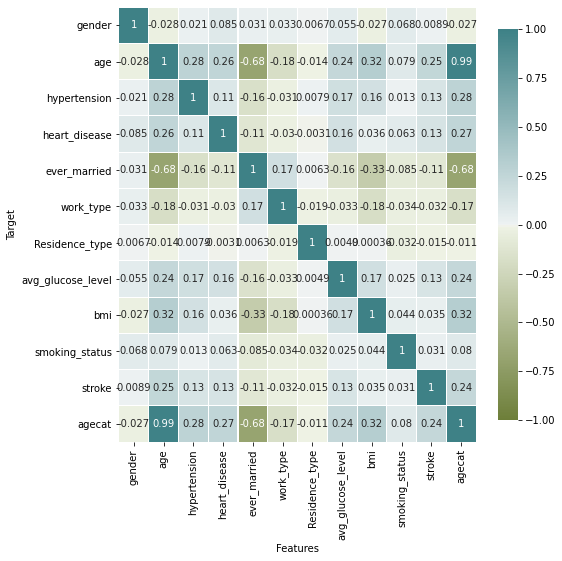

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn

def corrmap(train):
    fig , ax = plt.subplots(figsize =(8,8))
    fig = sbn.heatmap(train.corr(), cmap = sbn.diverging_palette(100, 200, as_cmap = True), cbar_kws={'shrink':.9 }, ax=ax,annot=True, linewidths=0.05, vmin=-1.0, vmax=1.0, linecolor='white')
    plt.xlabel("Features")
    plt.ylabel("Target")
corrmap(train)

In [ ]:
temp = train


In [ ]:
temp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,0,0,0,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,0,1,1,202.21,NaN,never smoked,1
2,31112,1,80.0,0,1,0,0,1,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,0,0,0,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,0,1,1,174.12,24.0,never smoked,1


In [ ]:
temp['age'].max()


82.0

In [ ]:
def ageconv(x):
    if x<=10:
        return 0
    if x<=20:
        return 1
    if x<=30:
        return 2  
    if x<=40:
        return 3
    if x<=50:
        return 4
    if x<=60:
        return 5
    if x<=70:
        return 6
    if x<=80:
        return 7
    if x<=90:
        return 8
    
temp['agecat'] = train['age'].apply(lambda x: ageconv(x))

In [ ]:
temp['agecat'].value_counts()


5    823
4    739
3    674
7    594
6    594
2    545
1    518
0    507
8    116
Name: agecat, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


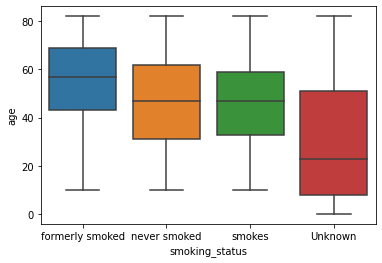

In [ ]:
sbn.boxplot(temp['smoking_status'],temp['age'])


In [ ]:
for x in range(10,100,10):
    print("Age less than",x)
    temp = train[train['age']<x]
    print("NaN values:",temp['smoking_status'].isnull().sum(axis=0))
    print(temp['smoking_status'].value_counts(),"\n")

Age less than 10
NaN values: 0
Unknown    472
Name: smoking_status, dtype: int64 

Age less than 20
NaN values: 0
Unknown            731
never smoked       187
formerly smoked     29
smokes              19
Name: smoking_status, dtype: int64 

Age less than 30
NaN values: 0
Unknown            848
never smoked       443
smokes             131
formerly smoked     93
Name: smoking_status, dtype: int64 

Age less than 40
NaN values: 0
Unknown            982
never smoked       731
smokes             275
formerly smoked    182
Name: smoking_status, dtype: int64 

Age less than 50
NaN values: 0
Unknown            1133
never smoked       1028
smokes              434
formerly smoked     305
Name: smoking_status, dtype: int64 

Age less than 60
NaN values: 0
never smoked       1355
Unknown            1284
smokes              598
formerly smoked     497
Name: smoking_status, dtype: int64 

Age less than 70
NaN values: 0
never smoked       1583
Unknown            1398
smokes              709
former

In [ ]:
def fillsmoking(x):
    if pd.isnull(x['smoking_status']):
        if x['age']<20:
            x['smoking_status'] = "never smoked"
    return x

train = train.apply(lambda x : fillsmoking(x),axis=1)


In [ ]:
temp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agecat
0,9046,1,67.0,0,1,0,0,0,228.69,36.6,formerly smoked,1,6
1,51676,0,61.0,0,0,0,1,1,202.21,NaN,never smoked,1,6
2,31112,1,80.0,0,1,0,0,1,105.92,32.5,never smoked,1,7
3,60182,0,49.0,0,0,0,0,0,171.23,34.4,smokes,1,4
4,1665,0,79.0,1,0,0,1,1,174.12,24.0,never smoked,1,7


In [ ]:
train['smoking_status'] = train['smoking_status'].map({'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3} ).astype(int)


In [ ]:
train['smoking_status'].value_counts()


0    1892
1    1544
2     885
3     789
Name: smoking_status, dtype: int64

In [ ]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agecat
0,9046,1,67.0,0,1,0,0,0,228.69,36.6,2,1,6
1,51676,0,61.0,0,0,0,1,1,202.21,NaN,0,1,6
2,31112,1,80.0,0,1,0,0,1,105.92,32.5,0,1,7
3,60182,0,49.0,0,0,0,0,0,171.23,34.4,3,1,4
4,1665,0,79.0,1,0,0,1,1,174.12,24.0,0,1,7


In [ ]:
print("Unique ID's : ", len(train['id'].unique()))


Unique ID's :  5110


In [ ]:
train.drop('id',axis=1,inplace=True)


In [ ]:
train.describe()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,agecat
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.343836,0.832094,0.491977,106.147677,28.893237,1.111742,0.048728,3.786888
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.109924,0.499985,45.283560,7.854067,1.071819,0.215320,2.247067
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000,2.000000
50%,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.885000,28.100000,1.000000,0.000000,4.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,33.100000,2.000000,0.000000,6.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000,8.000000


In [ ]:
print(pd.crosstab(train['smoking_status'],train['stroke']))


stroke             0   1
smoking_status          
0               1802  90
1               1497  47
2                815  70
3                747  42


In [ ]:
print(len(train[train['stroke']==1])/train.shape[0])


0.0487279843444227


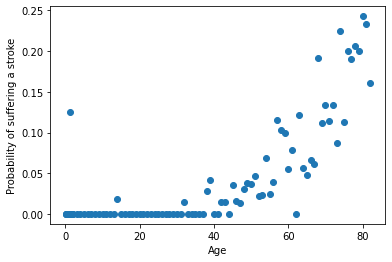

In [ ]:
temp = train.pivot_table(index=train['age'],values='stroke',aggfunc=('mean','count'))
plt.scatter(temp.index,temp['mean'])
plt.xlabel("Age")
plt.ylabel("Probability of suffering a stroke")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


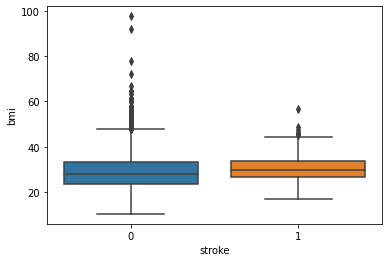

In [ ]:
sbn.boxplot(train['stroke'],train['bmi'])


In [ ]:
print("Median: ",train['bmi'].median())
print("Mean: ",train['bmi'].mean())

Median:  28.1
Mean:  28.893236911794673


In [ ]:
train['bmi'].fillna(27.7,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


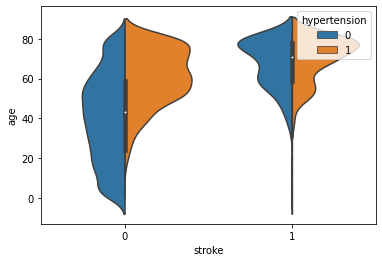

In [ ]:
sbn.violinplot(train['stroke'],train['age'],hue=train['hypertension'],split=True)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


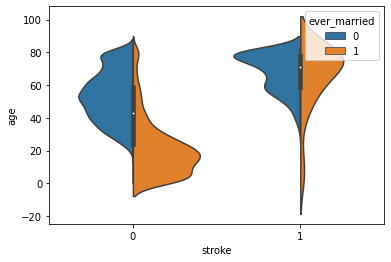

In [ ]:
sbn.violinplot(train['stroke'],train['age'],hue=train['ever_married'],split=True)


In [ ]:

temp = train
x = temp.columns
x = x.drop('stroke')

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 0.6)

x_train_res, y_train_res = sm.fit_sample(temp[x], temp['stroke'])
temp = x_train_res
#temp.head()
result = pd.DataFrame(columns=x,data=temp)
result['stroke']=y_train_res
result.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(7777, 12)

In [ ]:
len(result[result['stroke']==1])/result.shape[0]


0.37495178089237496

In [ ]:
result = result.sample(frac=1).reset_index(drop=True)


In [ ]:
result.to_csv('gdrive/My Drive/Brain Stroke/stroke_test.csv',index=False)


In [ ]:
test = pd.read_csv('gdrive/My Drive/Brain Stroke/stroke_test.csv')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7777 non-null   float64
 1   age                7777 non-null   float64
 2   hypertension       7777 non-null   float64
 3   heart_disease      7777 non-null   float64
 4   ever_married       7777 non-null   float64
 5   work_type          7777 non-null   float64
 6   Residence_type     7777 non-null   float64
 7   avg_glucose_level  7777 non-null   float64
 8   bmi                7777 non-null   float64
 9   smoking_status     7777 non-null   float64
 10  agecat             7777 non-null   float64
 11  stroke             7777 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 729.2 KB


In [ ]:
cols = test.columns
cols = cols.drop('stroke')
x = test[cols]
y = test['stroke']

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
import numpy as np
r = []

for train_index, test_index in kf.split(test):
    xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    model = RandomForestClassifier()
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    r.append(f1_score(pred,ytest))

c=0   
for i in ytest:
    if i==1:
        c+=1
        
print(c/len(ytest))
print(np.mean(r))

0.37556270096463024
0.9477135209684283


In [ ]:
cols = cols.drop('agecat')


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(test[cols],test['stroke'],test_size=0.2,random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
d = []
e = []
f = []
r = []
p = []
n = []
t = []

In [ ]:
from datetime import datetime

time1 = datetime.now()

model = LogisticRegression()
model.fit(xtrain,ytrain)
pred1 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred1,ytest))

f.append(f1_score(pred1,ytest))
p.append(precision_score(pred1,ytest))
r.append(recall_score(pred1,ytest))

n.append('LogisticRegression')

print(time2-time1)

0:00:00.142991


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred1))
print(classification_report(ytest,pred1))

[[790 171]
 [177 418]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       961
           1       0.71      0.70      0.71       595

    accuracy                           0.78      1556
   macro avg       0.76      0.76      0.76      1556
weighted avg       0.78      0.78      0.78      1556



In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score
time1 = datetime.now()

model = SGDClassifier()
model.fit(xtrain,ytrain)
pred2 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred2,ytest))
f.append(f1_score(pred2,ytest))
p.append(precision_score(pred2,ytest))
r.append(recall_score(pred2,ytest))

n.append('SGDClassifier')

print(time2-time1)

0:00:00.082733


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred2))
print(classification_report(ytest,pred2))

[[604 357]
 [ 58 537]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.74       961
           1       0.60      0.90      0.72       595

    accuracy                           0.73      1556
   macro avg       0.76      0.77      0.73      1556
weighted avg       0.79      0.73      0.74      1556



In [ ]:
time1 = datetime.now()

model = RandomForestClassifier(min_samples_leaf = 1, n_estimators = 400)
model.fit(xtrain,ytrain)
pred3 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred3,ytest))
f.append(f1_score(pred3,ytest))
p.append(precision_score(pred3,ytest))
r.append(recall_score(pred3,ytest))

n.append('RandomForestClassifier')

print(time2-time1)

0:00:03.017508


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred3))
print(classification_report(ytest,pred3))

[[953   8]
 [ 52 543]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       961
           1       0.99      0.91      0.95       595

    accuracy                           0.96      1556
   macro avg       0.97      0.95      0.96      1556
weighted avg       0.96      0.96      0.96      1556



In [ ]:
time1 = datetime.now()

model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
pred4 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred4,ytest))
f.append(f1_score(pred4,ytest))
p.append(precision_score(pred4,ytest))
r.append(recall_score(pred4,ytest))

n.append('DecisionTreeClassifier')

print(time2-time1)

0:00:00.036125


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred4))
print(classification_report(ytest,pred4))

[[918  43]
 [ 54 541]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       961
           1       0.93      0.91      0.92       595

    accuracy                           0.94      1556
   macro avg       0.94      0.93      0.93      1556
weighted avg       0.94      0.94      0.94      1556



In [ ]:
time1 = datetime.now()

model = AdaBoostClassifier()
model.fit(xtrain,ytrain)
pred5 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

f.append(f1_score(pred5,ytest))
p.append(precision_score(pred5,ytest))
r.append(recall_score(pred5,ytest))
d.append(roc_auc_score(pred5,ytest))

n.append('AdaBoostClassifier')

print(time2-time1)

0:00:00.357794


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred5))
print(classification_report(ytest,pred5))

[[949  12]
 [ 92 503]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       961
           1       0.98      0.85      0.91       595

    accuracy                           0.93      1556
   macro avg       0.94      0.92      0.93      1556
weighted avg       0.94      0.93      0.93      1556



In [ ]:

model = GaussianNB()
model.fit(xtrain,ytrain)
pred6 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

f.append(f1_score(pred6,ytest))
p.append(precision_score(pred6,ytest))
r.append(recall_score(pred6,ytest))
d.append(roc_auc_score(pred6,ytest))

n.append('GaussianN')

print(time2-time1)

0:00:00.411111


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred6))
print(classification_report(ytest,pred6))

[[749 212]
 [121 474]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       961
           1       0.69      0.80      0.74       595

    accuracy                           0.79      1556
   macro avg       0.78      0.79      0.78      1556
weighted avg       0.80      0.79      0.79      1556



In [ ]:
time1 = datetime.now()

model = QuadraticDiscriminantAnalysis()
model.fit(xtrain,ytrain)
pred7 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred7,ytest))
f.append(f1_score(pred7,ytest))
p.append(precision_score(pred7,ytest))
r.append(recall_score(pred7,ytest))

n.append('QuadraticDiscriminantAnalysis')

print(time2-time1)

0:00:00.007846


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred7))
print(classification_report(ytest,pred7))

[[762 199]
 [125 470]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       961
           1       0.70      0.79      0.74       595

    accuracy                           0.79      1556
   macro avg       0.78      0.79      0.78      1556
weighted avg       0.80      0.79      0.79      1556



In [ ]:

model = MLPClassifier()
model.fit(xtrain,ytrain)
pred8 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred8,ytest))
f.append(f1_score(pred8,ytest))
p.append(precision_score(pred8,ytest))
r.append(recall_score(pred8,ytest))

n.append('MLPClassifier')

print(time2-time1)

0:00:09.078412


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred8))
print(classification_report(ytest,pred8))

[[660 301]
 [ 56 539]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       961
           1       0.64      0.91      0.75       595

    accuracy                           0.77      1556
   macro avg       0.78      0.80      0.77      1556
weighted avg       0.81      0.77      0.77      1556



In [ ]:
time1 = datetime.now()

model = KNeighborsClassifier()
model.fit(xtrain,ytrain)
pred9 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred9,ytest))
f.append(f1_score(pred9,ytest))
p.append(precision_score(pred9,ytest))
r.append(recall_score(pred9,ytest))

n.append('KNeighborsClassifier')

print(time2-time1)

0:00:00.099288


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred9))
print(classification_report(ytest,pred9))

[[805 156]
 [ 20 575]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       961
           1       0.79      0.97      0.87       595

    accuracy                           0.89      1556
   macro avg       0.88      0.90      0.88      1556
weighted avg       0.90      0.89      0.89      1556



In [ ]:
time1 = datetime.now()

model = GradientBoostingClassifier()
model.fit(xtrain,ytrain)
pred10 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred10,ytest))
f.append(f1_score(pred10,ytest))
p.append(precision_score(pred10,ytest))
r.append(recall_score(pred10,ytest))

n.append('GradientBoostingClassifier')

print(time2-time1)

0:00:01.507539


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred10))
print(classification_report(ytest,pred10))

[[956   5]
 [ 68 527]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       961
           1       0.99      0.89      0.94       595

    accuracy                           0.95      1556
   macro avg       0.96      0.94      0.95      1556
weighted avg       0.96      0.95      0.95      1556



In [ ]:
time1 = datetime.now()

model = ExtraTreesClassifier()
model.fit(xtrain,ytrain)
pred11 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred11,ytest))
f.append(f1_score(pred11,ytest))
p.append(precision_score(pred11,ytest))
r.append(recall_score(pred11,ytest))

n.append('ExtraTreesClassifier')

print(time2-time1)

0:00:00.753459


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred11))
print(classification_report(ytest,pred11))

[[950  11]
 [ 43 552]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       961
           1       0.98      0.93      0.95       595

    accuracy                           0.97      1556
   macro avg       0.97      0.96      0.96      1556
weighted avg       0.97      0.97      0.97      1556



In [ ]:
time1 = datetime.now()

model = xgb.XGBClassifier()
model.fit(xtrain,ytrain)
pred12 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred12,ytest))
f.append(f1_score(pred12,ytest))
p.append(precision_score(pred12,ytest))
r.append(recall_score(pred12,ytest))

n.append('XGBClassifier')

print(time2-time1)

0:00:00.619375


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred12))
print(classification_report(ytest,pred12))

[[959   2]
 [ 67 528]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       961
           1       1.00      0.89      0.94       595

    accuracy                           0.96      1556
   macro avg       0.97      0.94      0.95      1556
weighted avg       0.96      0.96      0.96      1556



In [ ]:

time1 = datetime.now()

model = BaggingClassifier(n_estimators = 500, max_samples = 0.5, max_features = 0.5)
model.fit(xtrain,ytrain)
pred13 = model.predict(xtest)

time2 = datetime.now()

t.append((time2-time1).total_seconds())

d.append(roc_auc_score(pred13,ytest))

f.append(f1_score(pred13,ytest))
p.append(precision_score(pred13,ytest))
r.append(recall_score(pred13,ytest))

n.append('BaggingClassifier')

print(time2-time1)

0:00:04.127536


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ytest, pred13))
print(classification_report(ytest,pred13))

[[961   0]
 [ 59 536]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       961
           1       1.00      0.90      0.95       595

    accuracy                           0.96      1556
   macro avg       0.97      0.95      0.96      1556
weighted avg       0.96      0.96      0.96      1556



In [ ]:
print("Logistc_Regression",roc_auc_score(pred1,ytest))
print("SDG Classifier",roc_auc_score(pred2,ytest))
print("RandomForestClassifier",roc_auc_score(pred3,ytest))
print("DecisionTreeClassifier",roc_auc_score(pred4,ytest))
print("AdaBoostClassifier",roc_auc_score(pred5,ytest))
print("GaussianN",roc_auc_score(pred6,ytest))
print("QuadraticDiscriminantAnalysis",roc_auc_score(pred7,ytest))
print("MLPClassifier",roc_auc_score(pred8,ytest))
print("KNeighborsClassifier",roc_auc_score(pred9,ytest))
print("GradientBoostingClassifier",roc_auc_score(pred10,ytest))
print("ExtraTreesClassifier",roc_auc_score(pred11,ytest))
print("XGBClassifier",roc_auc_score(pred12,ytest))
print("BaggingClassifier",roc_auc_score(pred13,ytest))



Logistc_Regression 0.7633185442172332
SDG Classifier 0.7565289239441189
RandomForestClassifier 0.9668698251031593
DecisionTreeClassifier 0.9354071537290715
AdaBoostClassifier 0.9441612340635872
GaussianN 0.7759408196776247
QuadraticDiscriminantAnalysis 0.7808083208207576
MLPClassifier 0.7817271880819366
KNeighborsClassifier 0.8811756415039588
GradientBoostingClassifier 0.9620976268796992
ExtraTreesClassifier 0.9685793449349711
XGBClassifier 0.9654621354224135
BaggingClassifier 0.971078431372549


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AUC')

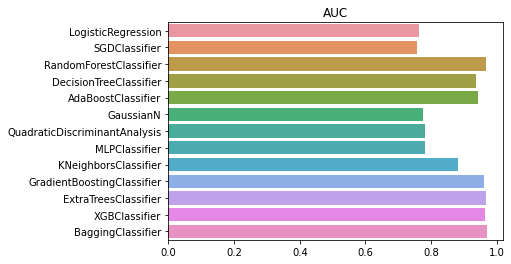

In [ ]:
# roc_auc_score
sbn.barplot(d,n).set_title("AUC")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'F-1 Score')

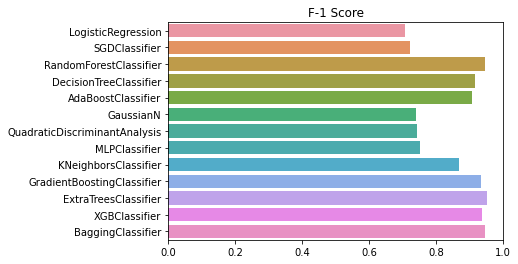

In [ ]:
# f-1 score
sbn.barplot(f,n).set_title("F-1 Score")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Precision')

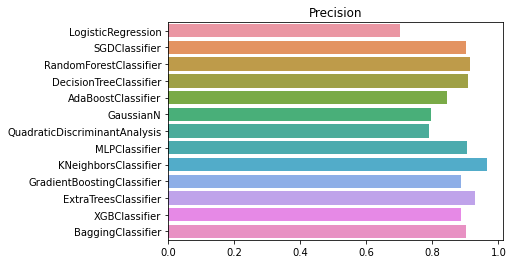

In [ ]:
# precision
sbn.barplot(p,n).set_title("Precision")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Recall')

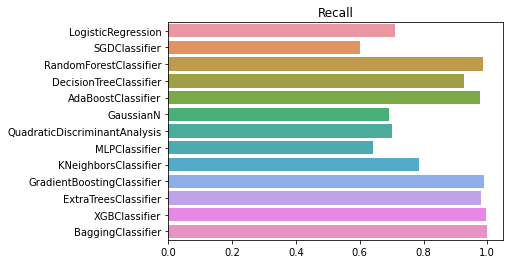

In [ ]:
# recall
sbn.barplot(r,n).set_title("Recall")